In [24]:
import pandas
import seaborn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pubmed_df = pandas.read_table('data/pubmed-since-2104.tsv.gz', compression='gzip')

In [4]:
len(pubmed_df)

1572538

In [5]:
pubmed_df.head()

,date_accepted,date_epublish,date_medline,date_pubmed,date_received,doi,epub_date,journal,journal_abbrev,pubdate,pubmed_id,pubtype
0,NaN,NaN,2015/06/26 06:00,2015/06/26 06:00,NaN,10.4244/EIJY15M06_04,2015 Jun 26,EuroIntervention : journal of EuroPCR in colla...,EuroIntervention,2015 Jun 26,26111405,Journal Article
1,NaN,NaN,2015/06/26 06:00,2015/06/26 06:00,NaN,10.1109/JBHI.2015.2448111,2015 Jun 22,IEEE journal of biomedical and health informatics,IEEE J Biomed Health Inform,2015 Jun 22,26111404,Journal Article
2,NaN,NaN,2015/06/26 06:00,2015/06/26 06:00,NaN,10.1109/TNNLS.2015.2442256,2015 Jun 22,IEEE transactions on neural networks and learn...,IEEE Trans Neural Netw Learn Syst,2015 Jun 22,26111403,Journal Article
3,NaN,NaN,2015/06/26 06:00,2015/06/26 06:00,NaN,10.1109/TNNLS.2015.2442233,2015 Jun 23,IEEE transactions on neural networks and learn...,IEEE Trans Neural Netw Learn Syst,2015 Jun 23,26111402,Journal Article
4,NaN,NaN,2015/06/26 06:00,2015/06/26 06:00,NaN,10.1109/TNNLS.2015.2441749,2015 Jun 24,IEEE transactions on neural networks and learn...,IEEE Trans Neural Netw Learn Syst,2015 Jun 24,26111401,Journal Article


In [9]:
journals = {
    'PeerJ',
    'Nucleic Acids Res',
    'BMC Genomics',
    'BMC Bioinformatics',
    'eLife',
    'Mol Syst Biol',
    'Genome Biol',
    'Genome Med',
    'Nat Commun',
    'PLoS Comput Biol',
    'PLoS One',
    'Database (Oxford)',
    'J Cheminform',
}


In [17]:
select_df = pubmed_df[pubmed_df.journal_abbrev.isin(journals)].copy()
for column in ['date_received', 'date_accepted', 'date_epublish']:
    select_df[column] = pandas.to_datetime(select_df[column])

In [19]:
len(select_df)

57832

In [40]:
select_df['acceptance_days'] = select_df.date_epublish - select_df.date_accepted
#select_df['acceptance_days'] = select_df['acceptance_days'].map(lambda x: x.days)

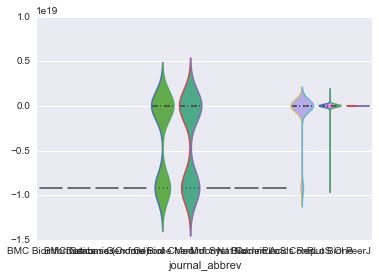

In [25]:
seaborn.violinplot(select_df.acceptance_days, select_df.journal_abbrev);

In [ ]:
select_df.pivot()

In [36]:
td = select_df['acceptance_days'].iloc[1000]

In [37]:
td.days

48

In [35]:
td.days

35

In [38]:
type(td)

pandas.tslib.Timedelta